In [77]:
import pandas as pd
import re

In [78]:
#Create volunteer Data Frame
volunteer = pd.read_csv('volunteer_opportunities.csv')
volunteer = volunteer.dropna(thresh=71,axis=1)

In [79]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

In [80]:
#convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
print(volunteer[["start_date_month" ,"start_date_converted"]].head())

   start_date_month start_date_converted
0                 7           2011-07-30
1                 2           2011-02-01
2                 1           2011-01-29
3                 2           2011-02-14
4                 2           2011-02-05


In [84]:
print(volunteer.corr() > 0.5)

                  opportunity_id  content_id  vol_requests  event_time   hits  \
opportunity_id              True        True         False       False  False   
content_id                  True        True         False       False  False   
vol_requests               False       False          True       False  False   
event_time                 False       False         False       False  False   
hits                       False       False         False       False   True   
category_id                False       False         False       False  False   
org_content_id             False       False         False       False  False   
addresses_count            False       False         False       False  False   
postalcode                 False       False         False       False  False   
hours                      False       False         False       False  False   
start_date_month            True        True         False       False  False   

                  category_

In [86]:
# Drop strony correlated features
volunteer = volunteer.drop(volunteer.corr() > 0.9, axis=1)
print(volunteer.shape)

(665, 14)


In [87]:
#################################################################

In [88]:
#Wine Dataset

In [89]:
wine = pd.read_csv('wine_types.csv')

In [90]:
wine.head()

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [99]:
import seaborn as sns

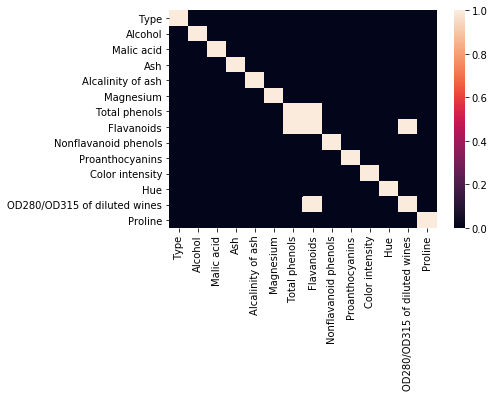

In [106]:
sns.heatmap(wine.corr() > 0.75)